In [ ]:
###David R. Rice
###Phys 604 Prof. Zhu
###Lecture 18 Homework

In [ ]:
##Gravitation Wave Signal
#y(t)=sin(t^2) 0<t<15
#y(t)=0 elsewhere

working, finding transform, count 20
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
transform found
normalize
finding inverse transform
count to 10
1
2
3
4
5
6
7
8
9
10


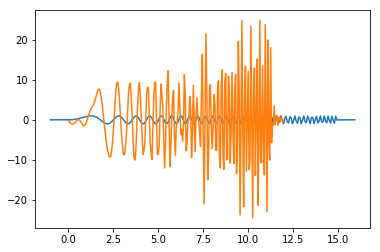

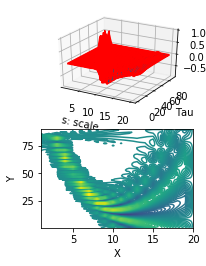

Done


In [33]:
""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""

# CWT.py  Continuous Wavelet TF. Based on program by Zlatko Dimcovic 
												
import matplotlib.pylab as p;
from mpl_toolkits.mplot3d import Axes3D ;
from numpy import *


iT =  -1.0;          fT =  16.0;         W = fT - iT;
N =  240;           h =  W/N
noPtsSig =  N;      noS =  20;          noTau =  90;
iTau =  0.;         iS =  0.1;          tau =  iTau;        s =  iS                
            
# Need *very* small s steps for high frequency;
dTau =  W/noTau;    dS =  (W/iS)**(1./noS);
maxY =  0.001;      sig =  zeros((noPtsSig), float)              # Signal
      
scaleval=[]
taus=[]
def signal(noPtsSig, y):                                # Signal function
    tar=array([])
    yyar=array([])
    t = -1.0;     hs = W/noPtsSig;     t1 = 0.0;    t2 = 15.0
    for i in range(0, noPtsSig):  
        if  t >= iT  and t <=  t1:  y[i] =  0
        elif t >= t1 and t <=  t2: y[i] = sin(t*t);
        elif t >= t2 and t <=  fT: 
             y[i] = 0
        else: 
            print("In signal(...) : t out of range.")
            sys.exit(1)
#        y[i] = sin(2*pi*t)
        yy=y[i]
        tar=append(tar,t)
        yyar=append(yyar,yy)
        t += hs  
    p.plot(tar,yyar)
        
signal(noPtsSig, sig)                                       # Form signal
Yn =  zeros( (noS+1, noTau+1), float)                       # Transform

def morlet(t, s, tau):                                      # Mother  
     T =  (t - tau)/s
     return sin(8*T) * exp( - T*T/2. )
	
def transform(s, tau, sig):                            # Find wavelet TF
    integral = 0.
    t = iT;                                                     
    for i in range(0, len(sig) ):
         t += h
         integral += sig[i]*morlet(t, s, tau)*h
    
             
    return integral / sqrt(s)
          
def invTransform(t, Yn):                                # Compute inverse
    s = iS                                                    # Transform
    tau = iTau                             
    recSig_t = 0                 
    for i in range (0, noS):
        s *= dS    
                                              # Scale graph
        tau = iTau     
        for j in range (0, noTau):
            tau += dTau                 
            recSig_t += dTau*dS *(s**(-1.5))* Yn[i,j] * morlet(t,s,tau)
    return recSig_t

print("working, finding transform, count 20")
for i in range( 0, noS):
    s *= dS   # Scaling
    
    tau = iT
    print(i)
    for j in range(0, noTau):
         tau += dTau                                      # Translate
         Yn[i, j] = transform(s, tau, sig)

        
print("transform found")  
for i in range( 0, noS):
    for j in range( 0, noTau):
        if Yn[i, j] > maxY or Yn[i, j] < - 1 *maxY :
            maxY = abs( Yn[i, j] )                      # Find max Y       
           
tau =  iT
s =  iS
print("normalize")      
for i in range( 0, noS):
     
     s *= dS  
     for j in range( 0, noTau):
         tau +=   dTau                                        # Transform
         Yn[i, j] = Yn[i, j]/maxY
     scaleval.append(s)    
    
     tau = iT
      
        
print("finding inverse transform")                           # Inverse TF
recSigData =  "recSig.dat"                   
recSig =  zeros(len(sig) )                                   
t =  0.0;
print("count to 10")
kco = 0;            j = 0;              Yinv =  Yn         
xxar=array([])
yyar2=array([])
for rs in range(0, len(recSig) ):                     
    recSig[rs] = invTransform(t, Yinv)          # Find input signal
    xx=rs/20
    yy=4.6*recSig[rs]
    xxar=append(xxar,xx)
    yyar2=append(yyar2,yy)
    t += h 
  
    if kco %24 == 0:
        j += 1
        print(j)                            
    kco += 1    
p.plot(xxar,yyar2)
x = list(range(1, noS + 1))                             
y = list(range(1, noTau + 1))                                         
X,Y = p.meshgrid(x, y)                                    

def functz(Yn):                                # Transform function
    z = Yn[X, Y]    
    return z
        
Z = functz(Yn)                                               
fig = p.figure()                                              
#ax = Axes3D(fig)      
ax = fig.add_subplot(2,2,1,projection='3d')

ax.plot_surface(X, Y, Z)  
ax.plot_wireframe(X, Y, Z, color = 'r')          
ax.set_xlabel('s: scale')                                         
ax.set_ylabel('Tau')
ax.set_zlabel('Transform')
ax = fig.add_subplot(2,2,3)
levels=p.arange(Z.min(),Z.max(),(Z.max() - Z.min())/100.)
CS=p.contour(x,y,Z, levels=levels)
p.xlabel('X')
p.ylabel('Y')
p.show()

print("Done")                                   

20
[0.12927735147653782, 0.16712633604788296, 0.2160565008624814, 0.27931212200789907, 0.36108731368472785, 0.4668041156493943, 0.6034719972950116, 0.7801526150055549, 1.008560638154132, 1.3038404810405302, 1.6855704413681478, 2.1790608238721303, 2.817032120164715, 3.641784515192304, 4.708002567723284, 6.086381027000056, 7.868312192476175, 10.171945608338705, 13.15002187609428, 17.000000000000018]


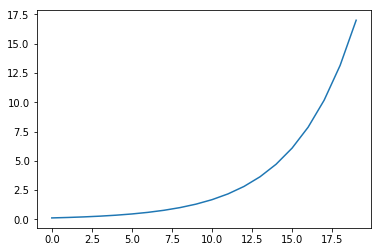

In [34]:
##Transform y axis to frequency
##I've spend two hours trying to get the right "s" to do f=2*pi/s out of the continuous wavelet
##This is the best I've got
p.plot(scaleval)
p.show()